In [285]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [286]:
df=pd.read_excel("car_data.xlsx")
df.head()

,Unnamed: 0,Location,Brand,Model,Mnf_year,Driven_kms,Fuel,Gear,Owners,Car_Price
0,0,Maharashtra,Nissan Sunny,XV,2012,44584.0 KM,DIESEL,MANUAL,2nd,"3,75,000"
1,1,Maharashtra,Skoda Superb,NaN,2016,27324.0 KM,PETROL,AUTOMATIC,--,"13,80,000"
2,2,Maharashtra,Bmw X5,2007-2013 xDrive 35i 3.0L,2011,"90,000 KM",DIESEL,AUTOMATIC,2nd,"17,50,000"
3,3,Maharashtra,Mahindra Jeep,Others,2000,50000 KM,DIESEL,MANUAL,Second,"3,00,000"
4,4,Maharashtra,Hyundai I10,2007-2010 Magna 1.2,2008,70000 KM,PETROL,MANUAL,Third,"1,35,000"


In [287]:
df.shape

(5009, 10)

In [288]:
df.isnull().sum()

Unnamed: 0      0
Location        0
Brand           0
Model         312
Mnf_year        0
Driven_kms      0
Fuel            0
Gear            0
Owners          0
Car_Price       0
dtype: int64

In [289]:
df.isin(['--']).sum()

Unnamed: 0      0
Location        0
Brand           0
Model           0
Mnf_year        0
Driven_kms      0
Fuel           37
Gear          177
Owners        205
Car_Price       0
dtype: int64

In [290]:
df.isin(['-']).sum()

Unnamed: 0      0
Location        0
Brand         107
Model         107
Mnf_year      107
Driven_kms    107
Fuel          107
Gear          107
Owners        107
Car_Price     107
dtype: int64

In [291]:
df.dtypes

Unnamed: 0     int64
Location      object
Brand         object
Model         object
Mnf_year      object
Driven_kms    object
Fuel          object
Gear          object
Owners        object
Car_Price     object
dtype: object

In [292]:
a=df.describe(include=['O']).columns

In [293]:
for i in a:
    print(i)
    print(df[i].value_counts())
    print('\n')

Location
Telangana        513
Karnataka        506
Tamil Nadu       506
Maharashtra      500
New Delhi        499
Haryana          499
Punjab           498
Uttar Pradesh    498
Kerala           497
Gujrat           493
Name: Location, dtype: int64


Brand
Maruti Suzuki Swift           245
Maruti Suzuki Swift Dzire     187
Maruti Suzuki Wagon R         140
Hyundai I10                   134
Honda City                    133
                             ... 
Jeep Grand Cherokee             1
Honda Others                    1
Mercedes-Benz B Class           1
Volkswagen Taigun               1
Fiat Linea Classic              1
Name: Brand, Length: 331, dtype: int64


Model
Others                   179
VXI                      134
VDI                      120
-                        107
LXI                       92
                        ... 
1.2P Titanium Plus MT      1
S8 7 Seater                1
230 K                      1
325i Sedan                 1
LXI Opt                    1
Name

In [294]:
df['Driven_kms']=df['Driven_kms'].apply(lambda x: x.replace(',','') if x!='-' else '-')
df.head()

,Unnamed: 0,Location,Brand,Model,Mnf_year,Driven_kms,Fuel,Gear,Owners,Car_Price
0,0,Maharashtra,Nissan Sunny,XV,2012,44584.0 KM,DIESEL,MANUAL,2nd,"3,75,000"
1,1,Maharashtra,Skoda Superb,NaN,2016,27324.0 KM,PETROL,AUTOMATIC,--,"13,80,000"
2,2,Maharashtra,Bmw X5,2007-2013 xDrive 35i 3.0L,2011,90000 KM,DIESEL,AUTOMATIC,2nd,"17,50,000"
3,3,Maharashtra,Mahindra Jeep,Others,2000,50000 KM,DIESEL,MANUAL,Second,"3,00,000"
4,4,Maharashtra,Hyundai I10,2007-2010 Magna 1.2,2008,70000 KM,PETROL,MANUAL,Third,"1,35,000"


In [295]:
#Removing km word from km_driven
df['Driven_kms']=df['Driven_kms'].apply(lambda x: x.split(' ')[0] if x!='-' else 0)
df.head()  #Checking the dataset after removing

,Unnamed: 0,Location,Brand,Model,Mnf_year,Driven_kms,Fuel,Gear,Owners,Car_Price
0,0,Maharashtra,Nissan Sunny,XV,2012,44584.0,DIESEL,MANUAL,2nd,"3,75,000"
1,1,Maharashtra,Skoda Superb,NaN,2016,27324.0,PETROL,AUTOMATIC,--,"13,80,000"
2,2,Maharashtra,Bmw X5,2007-2013 xDrive 35i 3.0L,2011,90000,DIESEL,AUTOMATIC,2nd,"17,50,000"
3,3,Maharashtra,Mahindra Jeep,Others,2000,50000,DIESEL,MANUAL,Second,"3,00,000"
4,4,Maharashtra,Hyundai I10,2007-2010 Magna 1.2,2008,70000,PETROL,MANUAL,Third,"1,35,000"


In [296]:
df['Driven_kms']=df['Driven_kms'].astype(float)

In [297]:
df.head()

,Unnamed: 0,Location,Brand,Model,Mnf_year,Driven_kms,Fuel,Gear,Owners,Car_Price
0,0,Maharashtra,Nissan Sunny,XV,2012,44584.0,DIESEL,MANUAL,2nd,"3,75,000"
1,1,Maharashtra,Skoda Superb,NaN,2016,27324.0,PETROL,AUTOMATIC,--,"13,80,000"
2,2,Maharashtra,Bmw X5,2007-2013 xDrive 35i 3.0L,2011,90000.0,DIESEL,AUTOMATIC,2nd,"17,50,000"
3,3,Maharashtra,Mahindra Jeep,Others,2000,50000.0,DIESEL,MANUAL,Second,"3,00,000"
4,4,Maharashtra,Hyundai I10,2007-2010 Magna 1.2,2008,70000.0,PETROL,MANUAL,Third,"1,35,000"


In [298]:
df['Driven_kms']=df['Driven_kms'].replace('-','90000.0')

In [299]:
df['Car_Price']=df['Car_Price'].apply(lambda x: x.replace(',','') if x!='-' else '-')
df.head()

,Unnamed: 0,Location,Brand,Model,Mnf_year,Driven_kms,Fuel,Gear,Owners,Car_Price
0,0,Maharashtra,Nissan Sunny,XV,2012,44584.0,DIESEL,MANUAL,2nd,375000
1,1,Maharashtra,Skoda Superb,NaN,2016,27324.0,PETROL,AUTOMATIC,--,1380000
2,2,Maharashtra,Bmw X5,2007-2013 xDrive 35i 3.0L,2011,90000.0,DIESEL,AUTOMATIC,2nd,1750000
3,3,Maharashtra,Mahindra Jeep,Others,2000,50000.0,DIESEL,MANUAL,Second,300000
4,4,Maharashtra,Hyundai I10,2007-2010 Magna 1.2,2008,70000.0,PETROL,MANUAL,Third,135000


In [300]:
df['Car_Price']=df['Car_Price'].replace('-',' 325000')

In [301]:
df['Car_Price']=df['Car_Price'].str.strip()

In [302]:
df['Car_Price']=df['Car_Price'].astype(float)

In [303]:
df.head()

,Unnamed: 0,Location,Brand,Model,Mnf_year,Driven_kms,Fuel,Gear,Owners,Car_Price
0,0,Maharashtra,Nissan Sunny,XV,2012,44584.0,DIESEL,MANUAL,2nd,375000.0
1,1,Maharashtra,Skoda Superb,NaN,2016,27324.0,PETROL,AUTOMATIC,--,1380000.0
2,2,Maharashtra,Bmw X5,2007-2013 xDrive 35i 3.0L,2011,90000.0,DIESEL,AUTOMATIC,2nd,1750000.0
3,3,Maharashtra,Mahindra Jeep,Others,2000,50000.0,DIESEL,MANUAL,Second,300000.0
4,4,Maharashtra,Hyundai I10,2007-2010 Magna 1.2,2008,70000.0,PETROL,MANUAL,Third,135000.0


In [304]:
df['Owners'].unique()

array(['2nd', '--', 'Second', 'Third', '1st', '3rd', 'First', 'Fourth',
       '4th', '-', '4+'], dtype=object)

In [305]:
df['Owners']=df['Owners'].replace('Second','2nd')

In [306]:
df['Owners']=df['Owners'].replace('First','1st')

In [307]:
df['Owners']=df['Owners'].replace('Third','3rd')

In [308]:
df['Owners']=df['Owners'].replace('Fourth','4th')

In [309]:
df['Owners']=df['Owners'].replace('--','-')

In [310]:
df['Owners'].unique()

array(['2nd', '-', '3rd', '1st', '4th', '4+'], dtype=object)

In [311]:
df['Owners'].value_counts()

1st    2760
2nd    1431
3rd     381
-       312
4th      96
4+       29
Name: Owners, dtype: int64

In [312]:
df['Owners']=df['Owners'].replace('-','1st')

In [313]:
df['Gear'].mode()

0    MANUAL
dtype: object

In [314]:
df['Gear']=df['Gear'].replace('-','MANUAL')

In [315]:
df['Gear']=df['Gear'].replace('--','MANUAL')

In [316]:
df['Gear'].value_counts()

MANUAL       4068
AUTOMATIC     941
Name: Gear, dtype: int64

In [317]:
df['Fuel'].value_counts()

DIESEL                           2547
PETROL                           2018
CNG & HYBRIDS                     195
-                                 107
CNG                                67
--                                 37
LPG                                31
ELECTRIC                            6
PETROL/COMPRESSED NATURAL GAS       1
Name: Fuel, dtype: int64

In [318]:
df['Fuel']=df['Fuel'].replace('--','DIESEL')

In [319]:
df['Fuel']=df['Fuel'].replace('-','DIESEL')

In [320]:
df['Fuel'].value_counts()

DIESEL                           2691
PETROL                           2018
CNG & HYBRIDS                     195
CNG                                67
LPG                                31
ELECTRIC                            6
PETROL/COMPRESSED NATURAL GAS       1
Name: Fuel, dtype: int64

In [321]:
df['Mnf_year'].value_counts()

2012      448
2013      437
2016      408
2014      404
2015      386
2011      376
2017      371
2018      369
2010      321
2009      223
2019      215
2007      178
2008      171
2020      129
-         107
2006      105
2021       87
2005       61
2004       40
2003       31
2002       26
2000       21
1998       15
2001       14
1999       13
1997        8
2015.0      6
1996        6
2012.0      4
2016.0      4
1994        4
2017.0      3
2014.0      3
1995        3
2013.0      2
2011.0      2
1992        1
1988        1
1905        1
1993        1
1954        1
1990        1
1981        1
1991        1
Name: Mnf_year, dtype: int64

In [322]:
df['Mnf_year']=df['Mnf_year'].replace('2015.0','2015')

In [323]:
df['Mnf_year']=df['Mnf_year'].replace('2012.0','2012')

In [324]:
df['Mnf_year']=df['Mnf_year'].replace('2016.0','2016')

In [325]:
df['Mnf_year']=df['Mnf_year'].replace('2017.0','2017')

In [326]:
df['Mnf_year']=df['Mnf_year'].replace('2014.0','2014')

In [327]:
df['Mnf_year']=df['Mnf_year'].replace('2013.0','2013')

In [328]:
df['Mnf_year']=df['Mnf_year'].replace('2011.0','2011')

In [329]:
df['Mnf_year'].value_counts()

2012    452
2013    439
2016    412
2014    407
2015    392
2011    378
2017    374
2018    369
2010    321
2009    223
2019    215
2007    178
2008    171
2020    129
-       107
2006    105
2021     87
2005     61
2004     40
2003     31
2002     26
2000     21
1998     15
2001     14
1999     13
1997      8
1996      6
1994      4
1995      3
1905      1
1992      1
1981      1
1988      1
1993      1
1954      1
1990      1
1991      1
Name: Mnf_year, dtype: int64

In [330]:
df['Mnf_year']=df['Mnf_year'].replace('-','2012')

In [331]:
df['Model'].value_counts()

Others                   179
VXI                      134
VDI                      120
-                        107
LXI                       92
                        ... 
1.2P Titanium Plus MT      1
S8 7 Seater                1
230 K                      1
325i Sedan                 1
LXI Opt                    1
Name: Model, Length: 1697, dtype: int64

In [332]:
df['Model']=df['Model'].replace('-','Others')

In [333]:
df['Brand'].mode()

0    Maruti Suzuki Swift 
dtype: object

In [334]:
df['Brand']=df['Brand'].replace('-','Maruti Suzuki Swift')

In [335]:
df.isin(['-']).sum()

Unnamed: 0    0
Location      0
Brand         0
Model         0
Mnf_year      0
Driven_kms    0
Fuel          0
Gear          0
Owners        0
Car_Price     0
dtype: int64

In [336]:
df.isin(['--']).sum()

Unnamed: 0    0
Location      0
Brand         0
Model         0
Mnf_year      0
Driven_kms    0
Fuel          0
Gear          0
Owners        0
Car_Price     0
dtype: int64

<AxesSubplot:xlabel='Driven_kms', ylabel='Car_Price'>

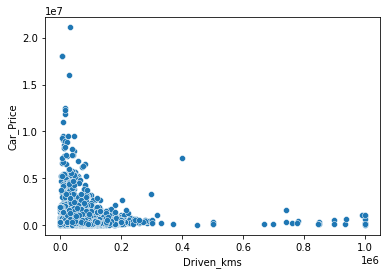

In [337]:
sn.scatterplot(df['Driven_kms'],df['Car_Price'])

<AxesSubplot:xlabel='Fuel', ylabel='count'>

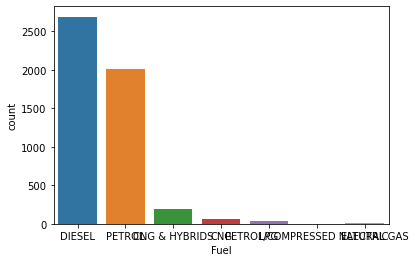

In [338]:
sn.countplot(df['Fuel'])

<AxesSubplot:xlabel='Gear', ylabel='count'>

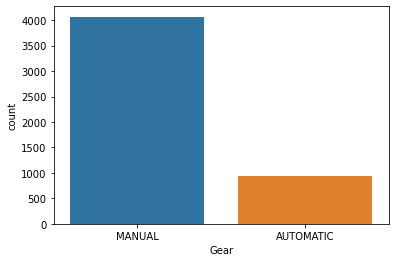

In [339]:
sn.countplot(df['Gear'])

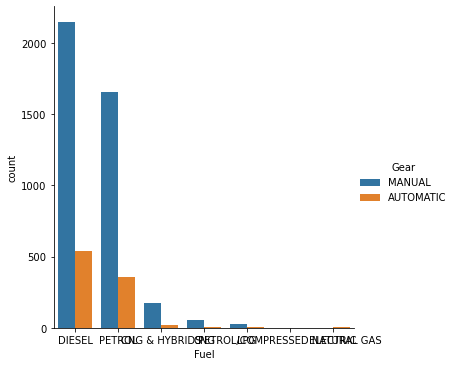

In [340]:
sn.catplot(x='Fuel',hue='Gear',kind='count',data=df)

In [341]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [342]:
df.skew()

Mnf_year     -3.351705
Driven_kms    7.600205
Car_Price     7.401500
dtype: float64

In [343]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Brand'] = le.fit_transform(df['Brand'])
df['Model'] = le.fit_transform(df['Model'])
df['Mnf_year'] = le.fit_transform(df['Mnf_year'])
df['Location'] = le.fit_transform(df['Location'])
df['Fuel'] = le.fit_transform(df['Fuel'])
df['Gear'] = le.fit_transform(df['Gear'])
df['Owners'] = le.fit_transform(df['Owners'])
df.head(5)

,Location,Brand,Model,Mnf_year,Driven_kms,Fuel,Gear,Owners,Car_Price
0,4,238,1625,26,44584.0,2,1,1,375000.0
1,4,263,1696,30,27324.0,5,0,0,1380000.0
2,4,26,486,25,90000.0,2,0,1,1750000.0
3,4,140,1335,14,50000.0,2,1,1,300000.0
4,4,100,467,22,70000.0,5,1,2,135000.0


In [345]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))   #converting all values into absolute values
threshold=3    #setting up a threshold
np.where(z>3)

(array([  63,   73,  102,  103,  103,  111,  118,  123,  132,  135,  142,
         185,  263,  288,  293,  324,  331,  355,  428,  455,  511,  515,
         548,  628,  644,  645,  672,  703,  733,  734,  747,  757,  759,
         804,  911,  921,  926,  965,  986, 1034, 1037, 1050, 1056, 1061,
        1063, 1087, 1097, 1097, 1131, 1132, 1142, 1143, 1144, 1175, 1176,
        1177, 1200, 1201, 1202, 1203, 1213, 1221, 1222, 1224, 1225, 1237,
        1247, 1248, 1255, 1266, 1268, 1269, 1271, 1272, 1273, 1299, 1300,
        1308, 1308, 1310, 1354, 1356, 1364, 1370, 1370, 1384, 1389, 1394,
        1396, 1397, 1408, 1448, 1458, 1472, 1475, 1498, 1498, 1509, 1510,
        1549, 1585, 1601, 1630, 1643, 1643, 1672, 1681, 1688, 1699, 1707,
        1725, 1733, 1733, 1754, 1757, 1761, 1764, 1815, 1818, 1825, 1830,
        1846, 1850, 1855, 1857, 1857, 1868, 1882, 1891, 1904, 1911, 1915,
        1930, 1933, 1935, 1935, 1942, 1966, 1971, 1972, 1974, 1986, 1987,
        1997, 1999, 2005, 2111, 2116, 

In [346]:
df_new=df[(z<3).all(axis=1)]
df_new

,Location,Brand,Model,Mnf_year,Driven_kms,Fuel,Gear,Owners,Car_Price
0,4,238,1625,26,44584.0,2,1,1,375000.0
1,4,263,1696,30,27324.0,5,0,0,1380000.0
2,4,26,486,25,90000.0,2,0,1,1750000.0
3,4,140,1335,14,50000.0,2,1,1,300000.0
4,4,100,467,22,70000.0,5,1,2,135000.0
...,...,...,...,...,...,...,...,...,...
5004,1,23,1687,29,62000.0,2,0,0,1037000.0
5005,1,68,1101,27,85000.0,2,1,1,275000.0
5006,1,108,1438,33,52150.0,2,1,0,925000.0
5007,1,163,1581,20,90000.0,5,0,1,89000.0


In [348]:
dataloss=((5009-4707)/5009)*100
dataloss

6.029147534438012

In [357]:
x=df_new.drop('Car_Price',axis=1)
y=df_new['Car_Price']
print(x.shape)
print(y.shape)

(4707, 8)
(4707,)


In [358]:
x.skew()

Location     -0.019892
Brand         0.273257
Model        -0.348551
Mnf_year     -0.414146
Driven_kms    0.864759
Fuel          0.230715
Gear         -1.726267
Owners        1.102437
dtype: float64

In [355]:
x['Driven_kms']=np.log1p(x['Driven_kms'])

In [359]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7
0,-0.181272,0.903227,1.191467,-0.306551,-0.632639,-0.751613,0.457946,0.875246
1,-0.181272,1.207058,1.322589,0.691503,-1.060954,1.181634,-2.183663,-0.708068
2,-0.181272,-1.673257,-0.912024,-0.556064,0.494380,-0.751613,-2.183663,0.875246
3,-0.181272,-0.287789,0.655899,-3.300712,-0.498239,-0.751613,0.457946,0.875246
4,-0.181272,-0.773918,-0.947113,-1.304605,-0.001929,1.181634,0.457946,2.458560


In [360]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [361]:
def chosen_model(model):
    maxAccu=0
    maxRS=0
    for i in range(1,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
        lm=model()
        lm.fit(x_train,y_train)
        pred=lm.predict(x_test)
        accu=r2_score(y_test,pred)
        if accu>maxAccu:
            maxAccu=accu
            maxRS=i
    print("best accuracy is",maxAccu,"on random state",maxRS)

In [362]:
chosen_model(RandomForestRegressor)

best accuracy is 0.8065249845579454 on random state 155


In [363]:
chosen_model(DecisionTreeRegressor)

best accuracy is 0.7203928527458308 on random state 16


In [364]:
chosen_model(AdaBoostRegressor)

best accuracy is 0.5412097538779104 on random state 2


In [365]:
chosen_model(GradientBoostingRegressor)

best accuracy is 0.7808404035895702 on random state 136


In [366]:
chosen_model(SVR)

best accuracy is 0 on random state 0


In [367]:
chosen_model(LinearRegression)

best accuracy is 0.4501019361178221 on random state 159


In [368]:
chosen_model(Lasso)

best accuracy is 0.45010116341622164 on random state 159


In [369]:
chosen_model(Ridge)

best accuracy is 0.45007430169953555 on random state 159


In [370]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=155)
from sklearn.model_selection import cross_val_score
score=cross_val_score(RandomForestRegressor(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.68944668 0.73556882 0.76546205 0.78092519 0.80342918]
0.7549663832336383
0.03950128779894544


In [373]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=136)
from sklearn.model_selection import cross_val_score
score=cross_val_score(GradientBoostingRegressor(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.68021811 0.67665132 0.72676278 0.73894957 0.77797194]
0.7201107433113311
0.038018976271067415


In [371]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=16)
from sklearn.model_selection import cross_val_score
score=cross_val_score(DecisionTreeRegressor(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.4050604  0.55042402 0.60704589 0.59667767 0.71291216]
0.5744240291352705
0.09999841476482625


In [372]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)
from sklearn.model_selection import cross_val_score
score=cross_val_score(AdaBoostRegressor(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.29576462 0.3658344  0.46490874 0.46801878 0.34623845]
0.3881529985624181
0.06791251332878556


In [376]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=159)
from sklearn.model_selection import cross_val_score
score=cross_val_score(LinearRegression(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.33704018 0.39245143 0.39531889 0.44430828 0.40869894]
0.39556354290495055
0.034592824521245305


In [375]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=159)
from sklearn.model_selection import cross_val_score
score=cross_val_score(Lasso(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.33704192 0.39245093 0.39531825 0.44430857 0.40869868]
0.39556367169786577
0.03459230959683636


In [374]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=159)
from sklearn.model_selection import cross_val_score
score=cross_val_score(Ridge(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.33709305 0.39245999 0.3953041  0.44430255 0.40869247]
0.39557043173574374
0.03457269696872614


In [377]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [378]:
parameter={
         'max_features':['auto','sqrt','log2'],
          'min_samples_split':np.arange(0,10),
          'max_depth':np.arange(0,10),
          'min_samples_leaf':np.arange(0,10)}

In [379]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=10)

In [380]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [381]:
GCV.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [405]:
car_mod=RandomForestRegressor(max_features='auto',max_depth=9,min_samples_leaf=3,min_samples_split=3)
car_mod.fit(x_train,y_train)
pred=car_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

77.32159092998832


In [406]:
import joblib
joblib.dump(car_mod,"usedcarpricemodel.pkl")

['usedcarpricemodel.pkl']